### People's Friendship University in Russia

#### Faculty of Science 
#### Department of Mathematical Modeling and Artificial Intelligence 

## Labratory work №5 report


### Meathods of machine learning

##### Student:  Abu Suveilim Mukhammed M.
##### Group:   NKNbd-01-21

## Moscow 2024
### Version №11

Option 11

1. stl10 data set

2. Classes labeled 1,2,3

3. Requirements for MLP network architecture:

Number of hidden layers 5

The number of neurons is 50 in the first hidden layer, increasing by 10 with each subsequent hidden layer

Adagrad optimizer

Activation function in hidden layers swish

L2 regularization in every odd hidden layer

4. CNN network architecture requirements:

Number of convolutional layers 5

Number of filters in convolutional layers 16

Filter dimensions 2x2

RMSprop optimizer

Activation function in convolutional layers leaky_relu

Activation function in hidden dense layers relu

Dropout layers after each pooling layer

5. Binary classification quality indicator:

Foulkes–Mallows index equal to the square root of TP/(TP + TN) * TP/(TP + FP)

6. Quality indicator of multi-class classification:

maximum completeness of classes, where completeness (recall) of a class is equal to the proportion of correct predictions for all points belonging to this class.

## 1. Load the data set with images specified in the individual task from Tensorflow Datasets, divided into training and test samples.

In [58]:
#load needed libraries and packags
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image, ImageOps
from math import sqrt

In [2]:
# loading stl10 dataset
ds = tfds.load("stl10", split=['train','test'])
print(ds)

[<_PrefetchDataset element_spec={'image': TensorSpec(shape=(96, 96, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>, <_PrefetchDataset element_spec={'image': TensorSpec(shape=(96, 96, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>]


In [3]:
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
df_train.shape, df_test.shape

((5000, 2), (8000, 2))

## 2. Render a few images randomly selected from the training set.

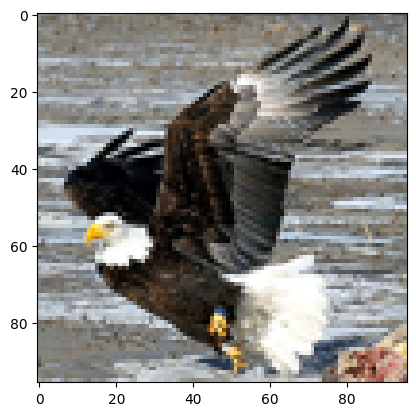

In [4]:
img = Image.fromarray(df_train.iloc[0]['image'])
plt.imshow(img)

In [5]:
np.array(img).shape

(96, 96, 3)

In [6]:
img = ImageOps.grayscale(img)
np.array(img).shape

(96, 96)

In [7]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');

def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');

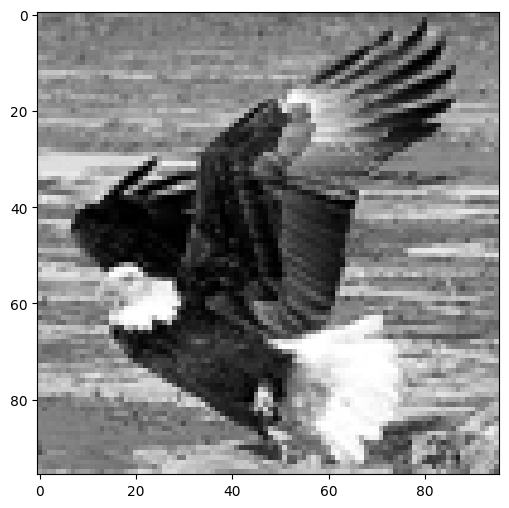

In [8]:
plot_image(img=img)

In [9]:
import random

def plot_random_sample(images):
    n = 10
    imgs = random.sample(list(images), n)

    num_row = 2
    num_col = 5

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = imgs[i]
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()

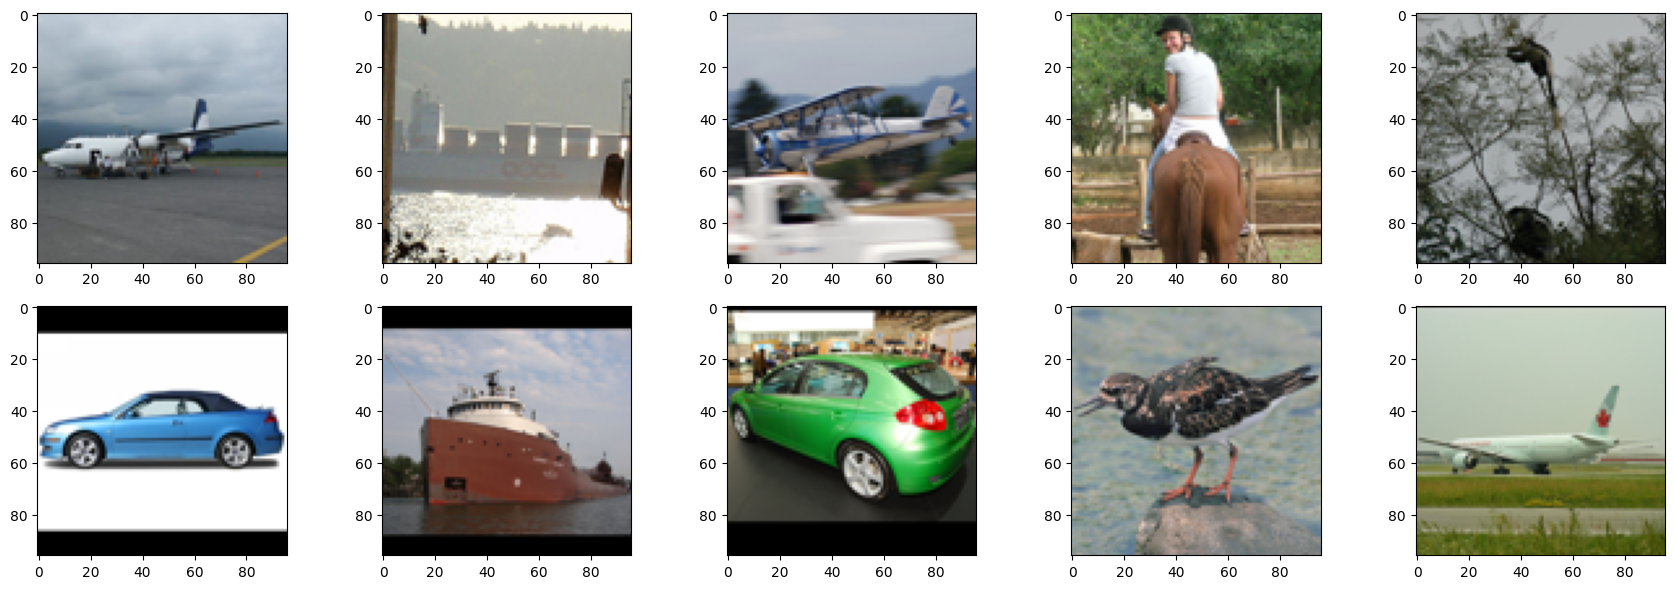

In [10]:
plot_random_sample(df_train['image'])

## 3. Leave in the set the images of the two classes listed first in the individual assignment. Train MLP and CNN neural networks for the task of binary image classification (network architecture requirements are specified in the individual assignment). Track the training of neural networks and indicate by what percentage the losses decreased as a result of training in relation to the losses in the first training epoch. Evaluate the results of training neural networks (options: neural network trained, undertrained, overtrained).

## 4. Plot learning curves for binary classification neural networks for loss rates and the proportion of correct answers depending on the training epoch, labeling the axes and figure and creating a legend.

In [11]:
X = df_train[df_train['label'] == 1]
X['label'] = 0
y = df_train[df_train['label'] == 2]
y['label'] = 1
df_train_01 = pd.concat([X, y])

C:\Users\Mo\AppData\Local\Temp\ipykernel_15028\3770910647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label'] = 0
C:\Users\Mo\AppData\Local\Temp\ipykernel_15028\3770910647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['label'] = 1


In [12]:
X = df_test[df_test['label'] == 1]
X['label'] = 0
y = df_test[df_test['label'] == 2]
y['label'] = 1
df_test_01 = pd.concat([X, y])
df_test_01['label'].value_counts()

C:\Users\Mo\AppData\Local\Temp\ipykernel_15028\3143479026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label'] = 0
C:\Users\Mo\AppData\Local\Temp\ipykernel_15028\3143479026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['label'] = 1


label
0    800
1    800
Name: count, dtype: int64

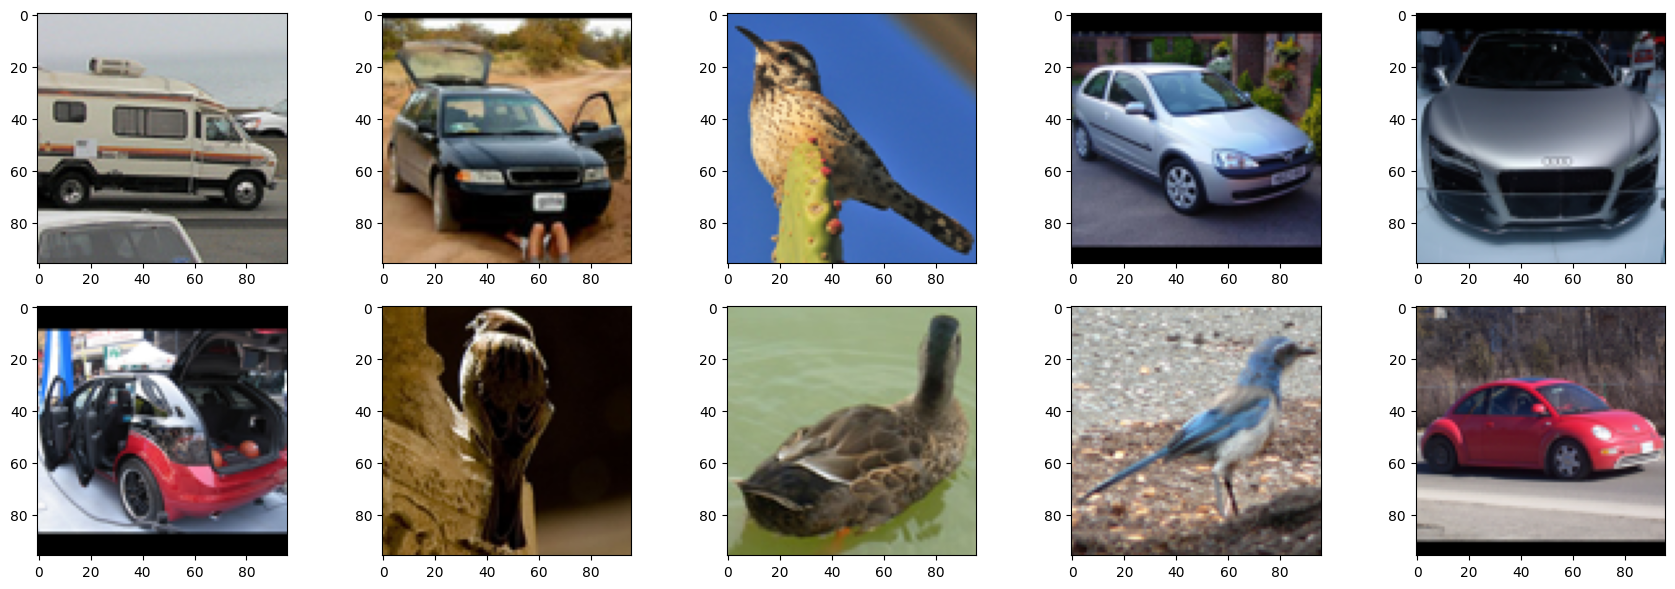

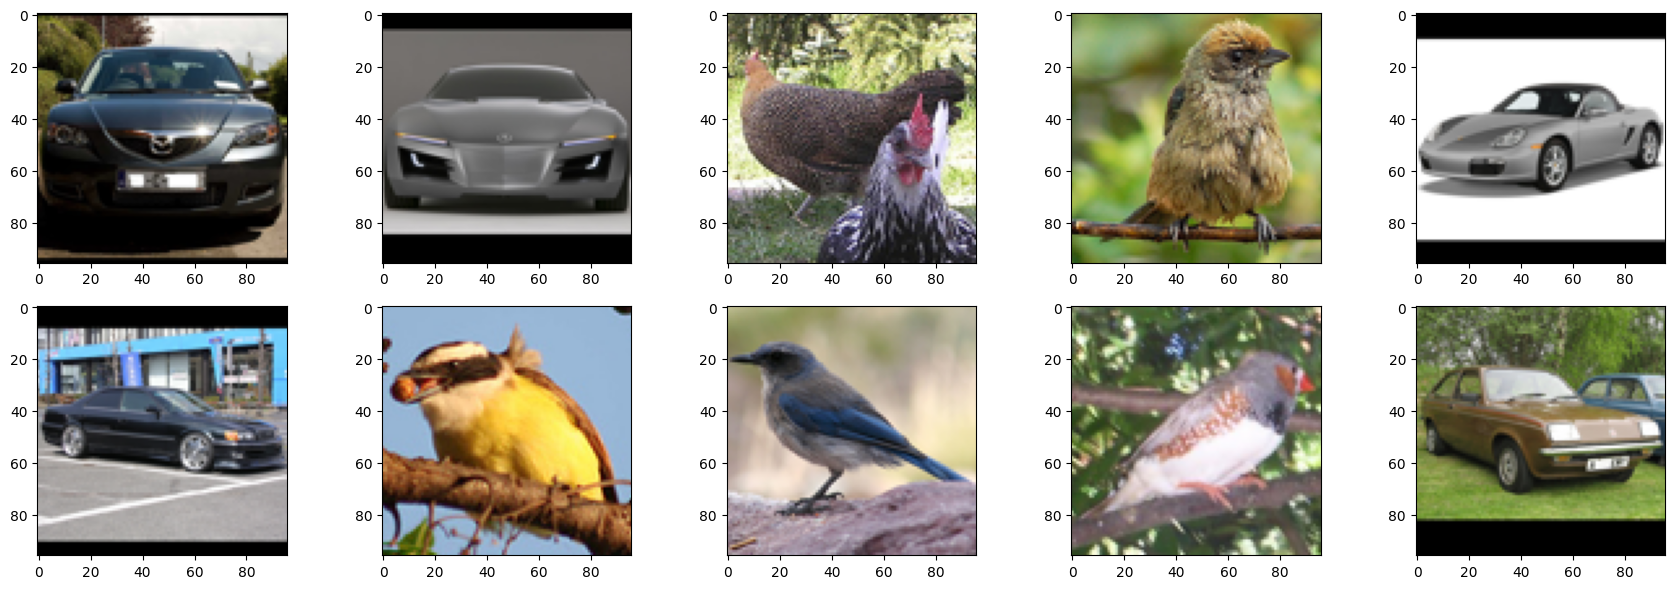

In [16]:
#let's check if we have correctly chose the lable
plot_random_sample(df_train_01['image'])
plot_random_sample(df_test_01['image'])

Labels 1 & 2 are birds and cars

In [17]:
train_labels = df_train_01['label'].to_numpy(dtype=np.float32)
test_labels = df_test_01['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape

((1000,), (1600,))

In [20]:
train_images = np.zeros(shape=(df_train_01.shape[0],96,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test_01.shape[0],96,96,3), dtype=np.float32)
train_images.shape, test_images.shape

((1000, 96, 96, 3), (1600, 96, 96, 3))

In [21]:
for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = \
        np.array(Image.fromarray(df_train_01.iloc[idx]['image']))

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = \
        np.array(Image.fromarray(df_test_01.iloc[idx]['image']))

train_images.shape, test_images.shape

((1000, 96, 96, 3), (1600, 96, 96, 3))

In [22]:
#make them into one channel/one array
train_images /= 255
test_images  /= 255

## Training the MLP neural network

Binary cross-entropy is used as the loss function.

In [23]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(96, 96, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='swish', kernel_regularizer ='l2'), #1
    tf.keras.layers.Dense(60, activation='swish'),
    tf.keras.layers.Dense(70, activation='swish', kernel_regularizer ='l2'), #3
    tf.keras.layers.Dense(80, activation='swish'),
    tf.keras.layers.Dense(90, activation='swish', kernel_regularizer ='l2'), #5
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adagrad(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_1 = model_1.fit(
    train_images,
    train_labels,
    epochs=50,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.4540 - loss: 3.1864 - val_accuracy: 0.5831 - val_loss: 3.1829
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5952 - loss: 3.1817 - val_accuracy: 0.5888 - val_loss: 3.1780
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5955 - loss: 3.1762 - val_accuracy: 0.5337 - val_loss: 3.1721
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5465 - loss: 3.1696 - val_accuracy: 0.5050 - val_loss: 3.1650
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5227 - loss: 3.1616 - val_accuracy: 0.5013 - val_loss: 3.1568
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5165 - loss: 3.1526 - val_accuracy: 0.5013 - val_loss: 3.1483
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5165 - loss: 3.1434 - val_accuracy: 0.5013 - val_loss: 3.1401
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5165 - loss: 3.1344 - val_accuracy: 0.5019 - val_loss: 3.1323


The model trained (accuracy was 0.4540 at epoch 1 and at epoch 50 it is 0.8979 

## Model quality indicators

We visualize the losses on the training and test samples and the share of correct answers (accuracy) on the training and test samples.

In [25]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

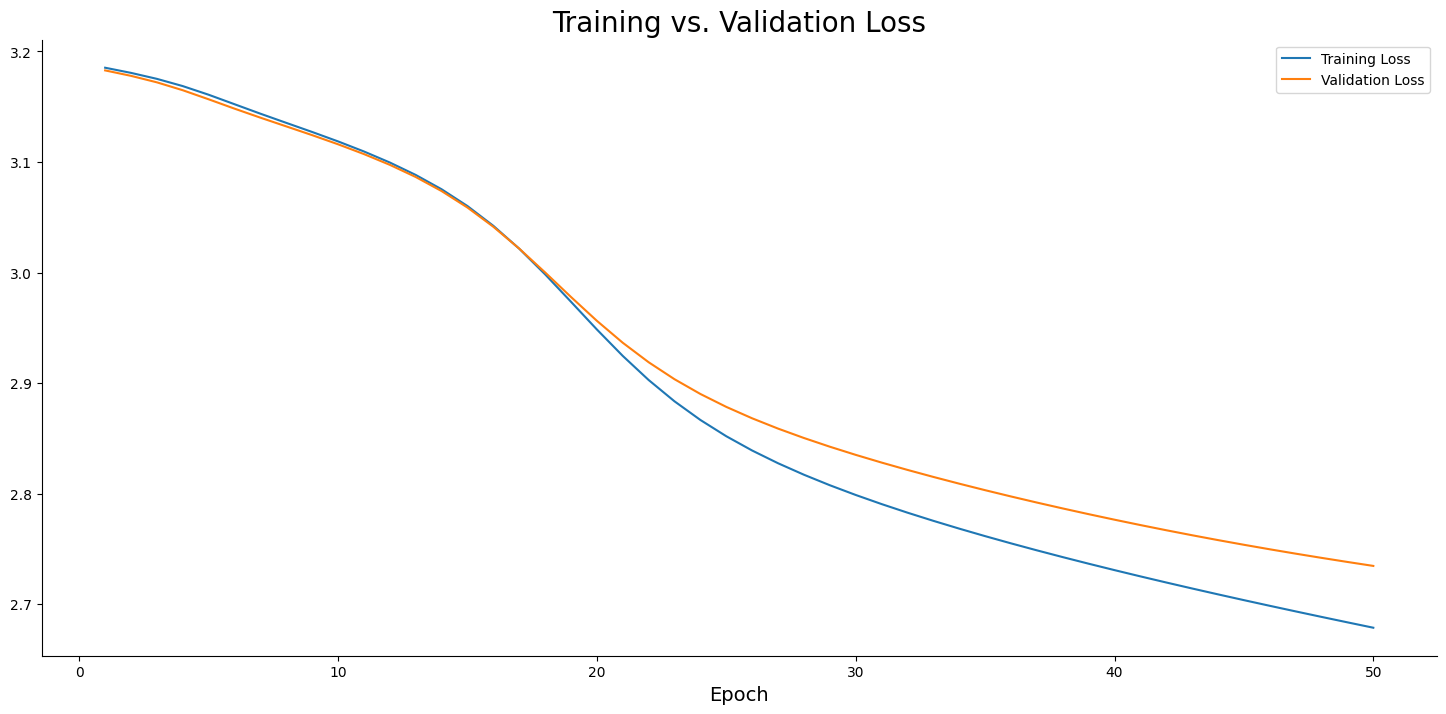

In [26]:
plt.plot(np.arange(1, 51), history_1.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 51), history_1.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

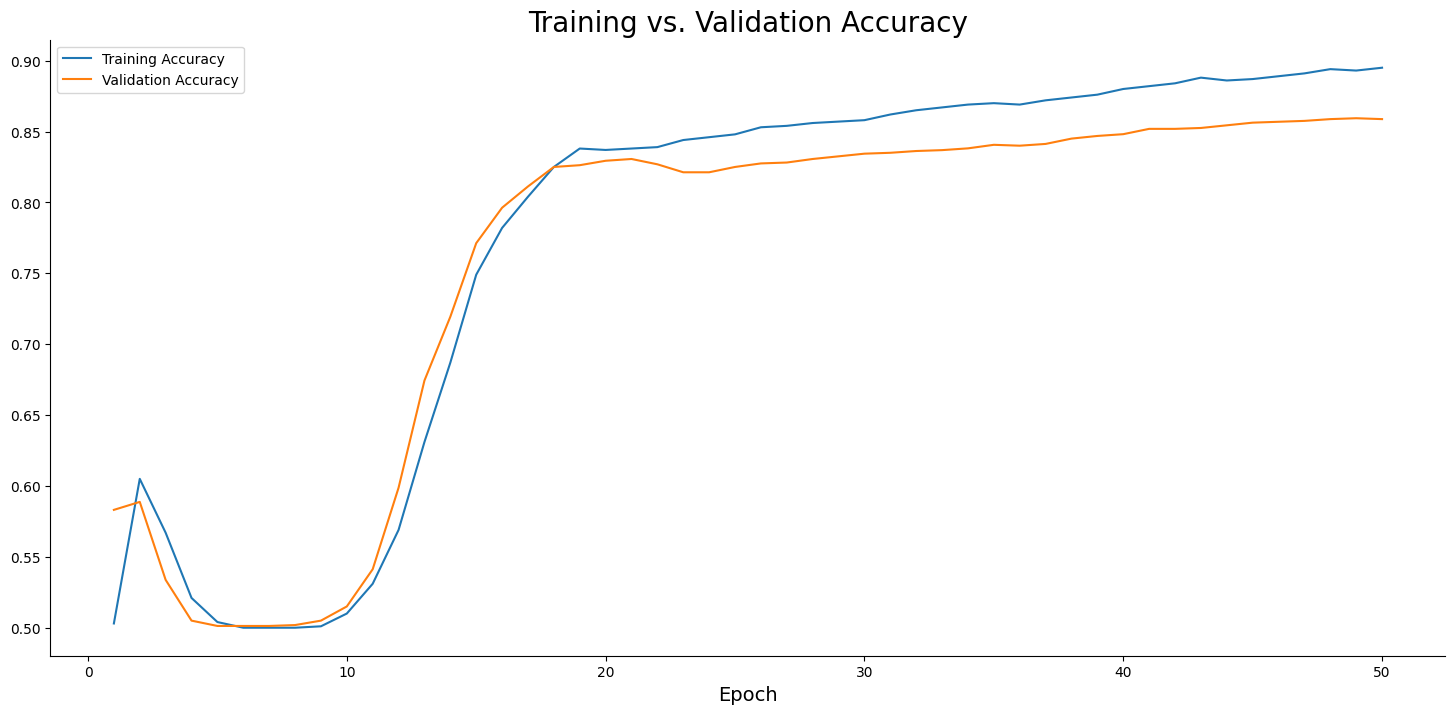

In [27]:
plt.plot(np.arange(1, 51), history_1.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 51), history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

Показатели качества модели достаточно хороший, не смотря на то что на обучении кчество было на 5% выше.

## Training a convolutional model

As with conventional neural networks (with dense layers), convolutional neural networks require experimentation.
It is not known in advance how many convolutional layers will be needed, what is the ideal number of filters for each layer, and what is the optimal kernel size.

Convolutional layers are usually followed by a pooling layer to reduce the image size.
After the convolutional layers, you must add a `Flatten` layer.
Dense layers follow.

The output layer and loss function must be chosen correctly.

In [29]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),
                           input_shape=(98, 96, 3), activation='leaky_relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),
                           activation='leaky_relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),
                           input_shape=(98, 96, 3), activation='leaky_relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),
                           activation='leaky_relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),
                           activation='leaky_relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_2 = model_2.fit(
    train_images,
    train_labels,
    epochs=50,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.4832 - loss: 0.7589 - val_accuracy: 0.5331 - val_loss: 0.6903
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5416 - loss: 0.6961 - val_accuracy: 0.5431 - val_loss: 0.6872
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5968 - loss: 0.6754 - val_accuracy: 0.5594 - val_loss: 0.6783
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6436 - loss: 0.6399 - val_accuracy: 0.7144 - val_loss: 0.6514
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6641 - loss: 0.6065 - val_accuracy: 0.6606 - val_loss: 0.6298
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7315 - loss: 0.5568 - val_accuracy: 0.7237 - val_loss: 0.5972
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7446 - loss: 0.5255 - val_accuracy: 0.7794 - val_loss: 0.5500
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7481 - loss: 0.5125 - val_accuracy: 0.7881 - val_loss: 0.5336


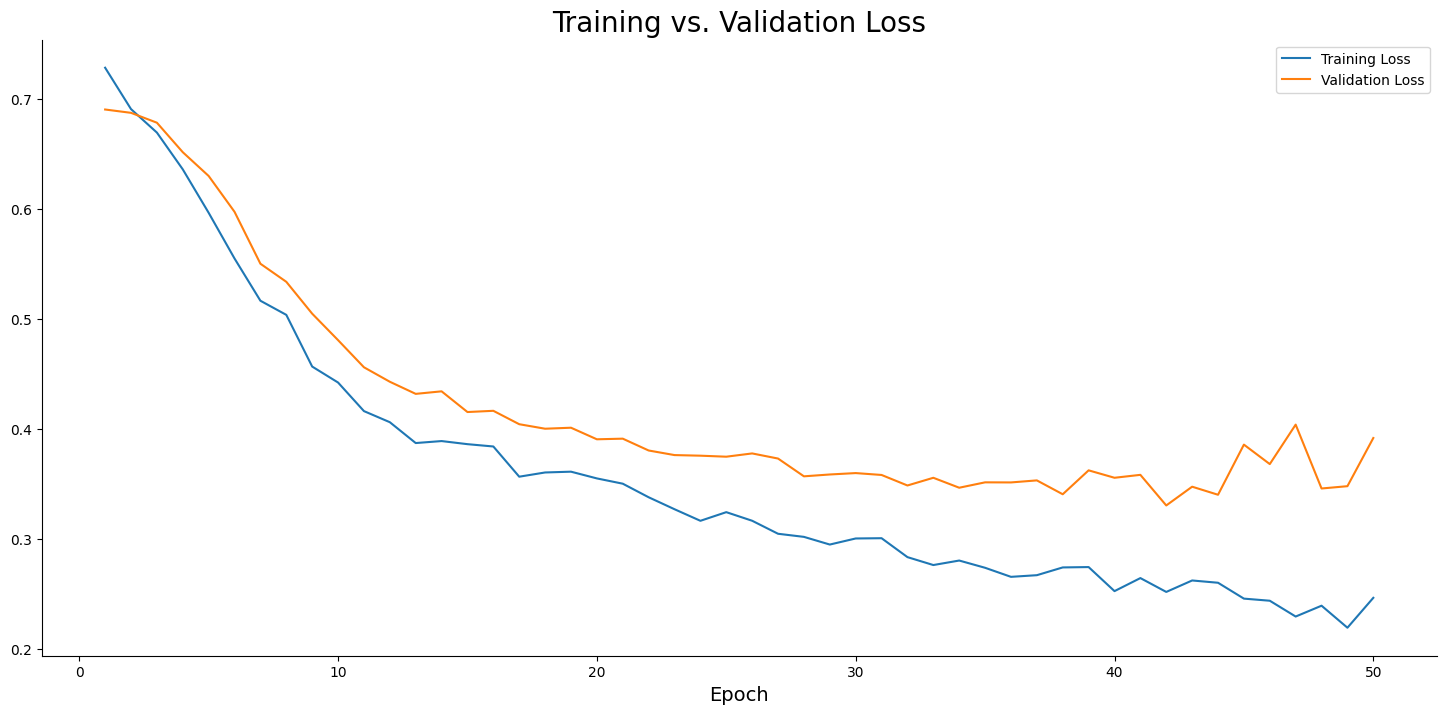

In [34]:
plt.plot(np.arange(1, 51), history_2.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 51), history_2.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

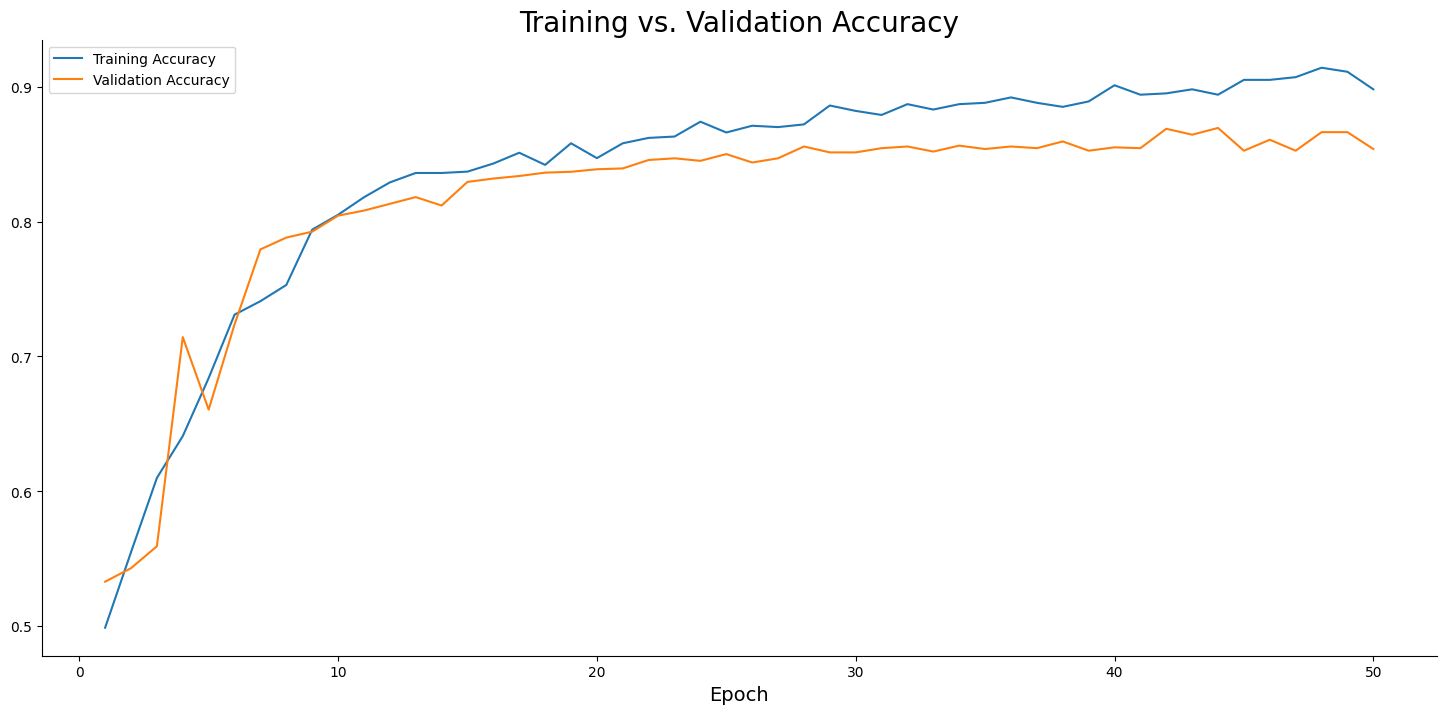

In [36]:
plt.plot(np.arange(1, 51), history_2.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 51), history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [45]:
loss01 = (history_1.history['loss'][0] - history_1.history['loss'][-1])
loss02 = (history_2.history['loss'][0] - history_2.history['loss'][-1])
print("Model 1 MLP loss: ", loss01)
print("Model 2 CNN loss: ", loss02)

Model 1 MLP loss:  0.5064220428466797
Model 2 CNN loss:  0.48201826214790344


Both models 1 and 2 were trained and improved. However, model 1 "learned" better as the gap between the first epoch and the 50th epoch is bigger than that of the 2nd model. In absoulte loss values model 2 is considerbly more accurate.

In [44]:
print(history_1.history['loss'][0], history_1.history['loss'][-1])
print(history_2.history['loss'][0], history_2.history['loss'][-1])

3.1853199005126953 2.6788978576660156
0.728262186050415 0.2462439239025116


## 5. Compare the quality of binary classification by neural networks using the quality indicator specified in the individual task.

Binary classification quality indicator:
Foulkes–Mallows index equal to the square root of TP/(TP + TN) * TP/(TP + FP)

## 6. Visualize the ROC curves for the constructed classifiers in one figure (with legend) and calculate the areas under the ROC curves.

In [46]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TP(y_true, y_predict), FN(y_true, y_predict)],
        [FP(y_true, y_predict), TN(y_true, y_predict)]
    ])

In [56]:
def FMI(y_true, y_predict):
        return TP(y_true, y_predict) / sqrt((TP(y_true, y_predict) + FP(y_true, y_predict)) * (TP(y_true, y_predict) + FN(y_true, y_predict)))

In [48]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [49]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):

        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])

    return roc.reshape(-1, 2)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


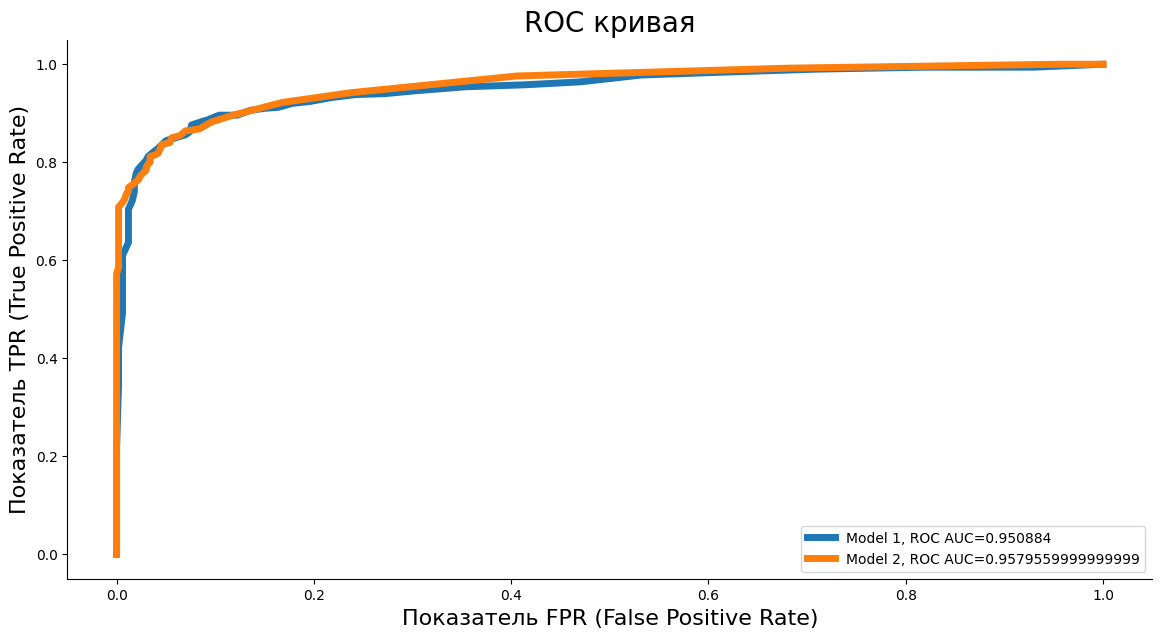

In [52]:
plt.figure(figsize=(14,7))
predictionFromModel_01 = model_1.predict(train_images)
predictionFromModel_02 = model_2.predict(train_images)
r1 = roc_auc_score(train_labels, predictionFromModel_01)
r2 = roc_auc_score(train_labels, predictionFromModel_02)
ROC1 = roc_from_scratch(predictionFromModel_01.reshape(-1),train_labels,partitions=50)
plt.plot(ROC1[:,0],ROC1[:,1],lw=5, label='Model 1, ROC AUC=' + str
(r1))
ROC2 = roc_from_scratch(predictionFromModel_02.reshape(-1),train_labels,partitions=50)
plt.plot(ROC2[:,0],ROC2[:,1],lw=5, label='Model 2, ROC AUC=' + str
(r2))
plt.title('ROC кривая',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16)
plt.legend();

In [60]:
y_predict_01 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(predictionFromModel_01)])
y_predict_02 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(predictionFromModel_02)])
FMI(np.array(train_labels), y_predict_01), FMI(np.array(train_labels), y_predict_02)

(0.8895457136504374, 0.8592627465056701)

In [62]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(np.array(train_labels), y_predict_01), fowlkes_mallows_score(np.array(train_labels), y_predict_02)

(0.8090419573545398, 0.7780152274006994)

## 7. Leave in the set the images of the three classes specified in the individual assignment. Train MLP and CNN neural networks for the task of multi-class image classification (network architecture requirements are specified in the individual task).

## 8. Compare the quality of multi-class classification by neural networks using the quality indicator specified in the individual task.

## 9. Plot learning curves for multiclass classification neural networks for error rates and the proportion of correct answers depending on the training epoch, labeling the axes and figure and creating a legend. Provide the program code with the necessary comments.

In [70]:
X = df_train[df_train['label'] == 1]
X['label'] = 0
y = df_train[df_train['label'] == 2]
y['label'] = 1
z = df_train[df_train['label'] == 3]
z['label'] = 2
df_train_02 = pd.concat([X, y, z])

X = df_test[df_test['label'] == 1]
X['label'] = 0
y = df_test[df_test['label'] == 2]
y['label'] = 1
z = df_test[df_test['label'] == 3]
z['label'] = 2
df_test_02 = pd.concat([X, y, z])
df_train_02['label'].value_counts(), df_test_02['label'].value_counts()

C:\Users\Mo\AppData\Local\Temp\ipykernel_15028\169528981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label'] = 0
C:\Users\Mo\AppData\Local\Temp\ipykernel_15028\169528981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['label'] = 1
C:\Users\Mo\AppData\Local\Temp\ipykernel_15028\169528981.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

(label
 0    500
 1    500
 2    500
 Name: count, dtype: int64,
 label
 0    800
 1    800
 2    800
 Name: count, dtype: int64)

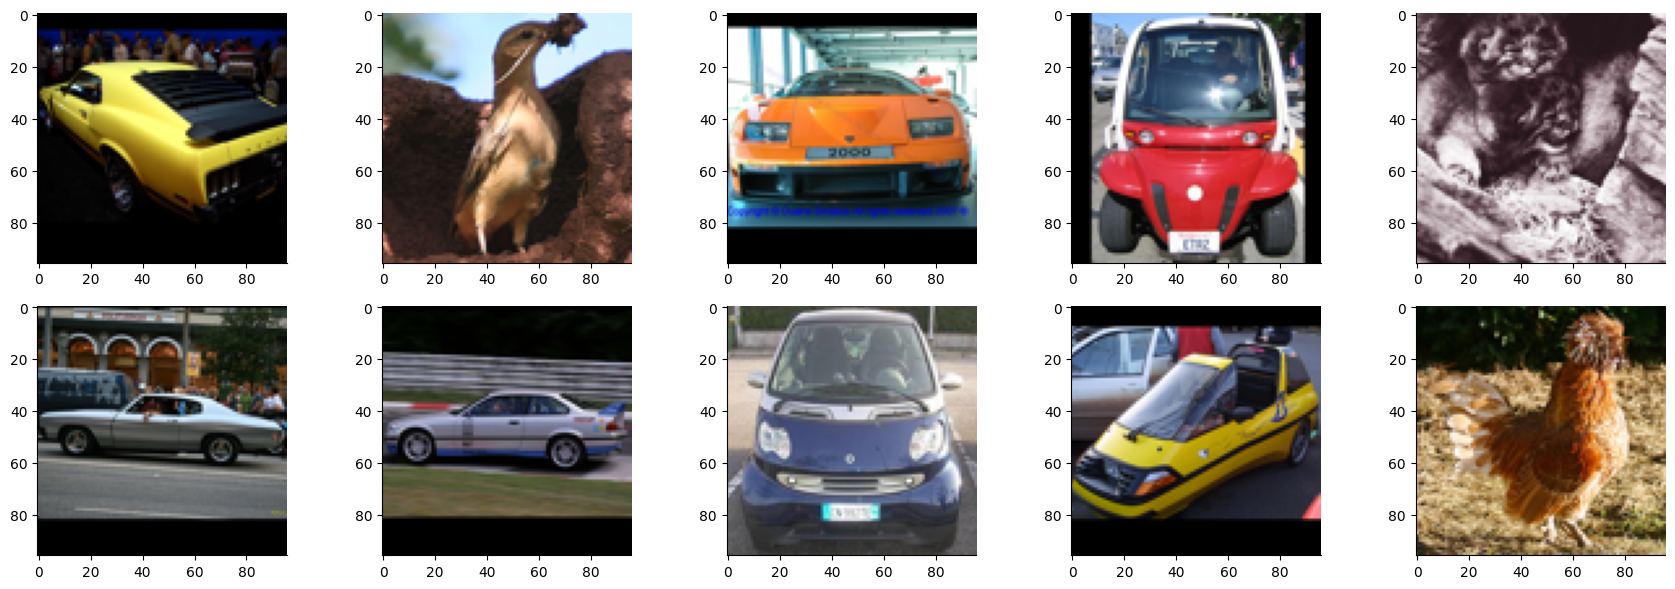

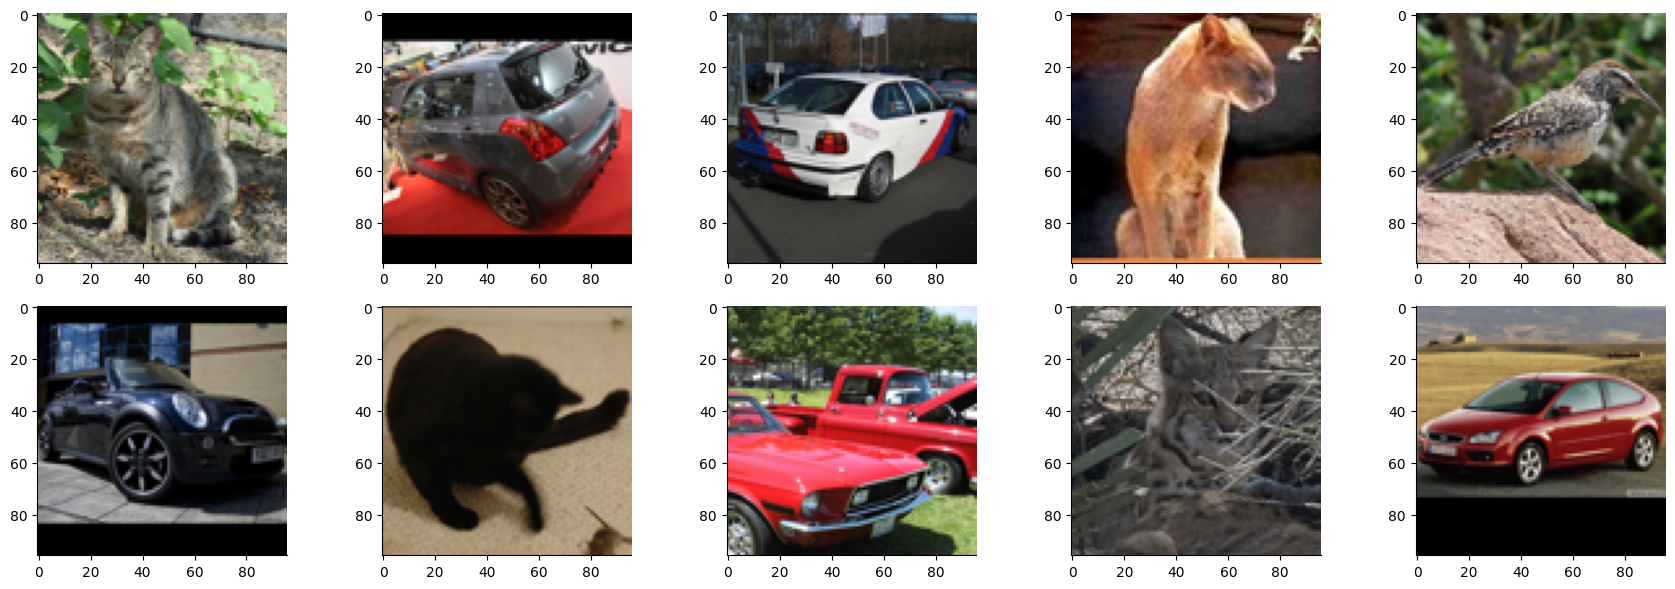

In [71]:
#let's check if we have correctly chose the lable
plot_random_sample(df_train_02['image'])
plot_random_sample(df_test_02['image'])

In [72]:
train_labels_02 = df_train_02['label'].to_numpy(dtype=np.float32)
test_labels_02 = df_test_02['label'].to_numpy(dtype=np.float32)
train_labels_02.shape, test_labels_02.shape

((1500,), (2400,))

In [88]:
label_train = list(df_train_02['label'])
label_test = list(df_test_02['label'])

In [83]:
def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [90]:
train_labels_02 = to_one_hot(label_train)
test_labels_02 = to_one_hot(label_test)
train_labels_02.shape, test_labels_02.shape

((1500, 3), (2400, 3))

In [86]:
train_images_02 = np.zeros(shape=(df_train_02.shape[0],96,96,3), dtype=np.float32)
test_images_02 = np.zeros(shape=(df_test_02.shape[0],96,96,3), dtype=np.float32)

In [93]:
for idx in range(train_labels.shape[0]):
    train_images_02[idx,:,:,:] = \
    np.array(Image.fromarray(df_train_02.iloc[idx]['image']))
for idx in range(test_labels.shape[0]):
    test_images_02[idx,:,:,:] = \
    np.array(Image.fromarray(df_test_02.iloc[idx]['image']))

In [94]:
train_images_02 /= 255
test_images_02 /= 255
train_images_02.shape, test_images_02.shape, train_labels_02.shape, test_labels_02.shape

((1500, 96, 96, 3), (2400, 96, 96, 3), (1500, 3), (2400, 3))

In [97]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(96, 96, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='swish', kernel_regularizer ='l2'), #1
    tf.keras.layers.Dense(60, activation='swish'),
    tf.keras.layers.Dense(70, activation='swish', kernel_regularizer ='l2'), #3
    tf.keras.layers.Dense(80, activation='swish'),
    tf.keras.layers.Dense(90, activation='swish', kernel_regularizer ='l2'), #5
    tf.keras.layers.Dense(3, activation='softmax')
])

model_3.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adagrad(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')]
)

history_3 = model_3.fit(
    train_images_02,
    train_labels_02,
    epochs=50,
    batch_size=128,
    validation_data=(test_images_02, test_labels_02)
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3988 - loss: 3.5746 - val_accuracy: 0.6808 - val_loss: 3.5460
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6784 - loss: 3.5330 - val_accuracy: 0.6667 - val_loss: 3.4786
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6761 - loss: 3.4622 - val_accuracy: 0.6667 - val_loss: 3.4132
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6761 - loss: 3.4032 - val_accuracy: 0.6667 - val_loss: 3.3724
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6761 - loss: 3.3652 - val_accuracy: 0.6667 - val_loss: 3.3420
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6761 - loss: 3.3361 - val_accuracy: 0.6667 - val_loss: 3.3165
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6766 - loss: 3.3111 - val_accuracy: 0.6667 - val_loss: 3.2932
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6785 - loss: 3.2872 - val_accuracy: 0.6892 - val_los

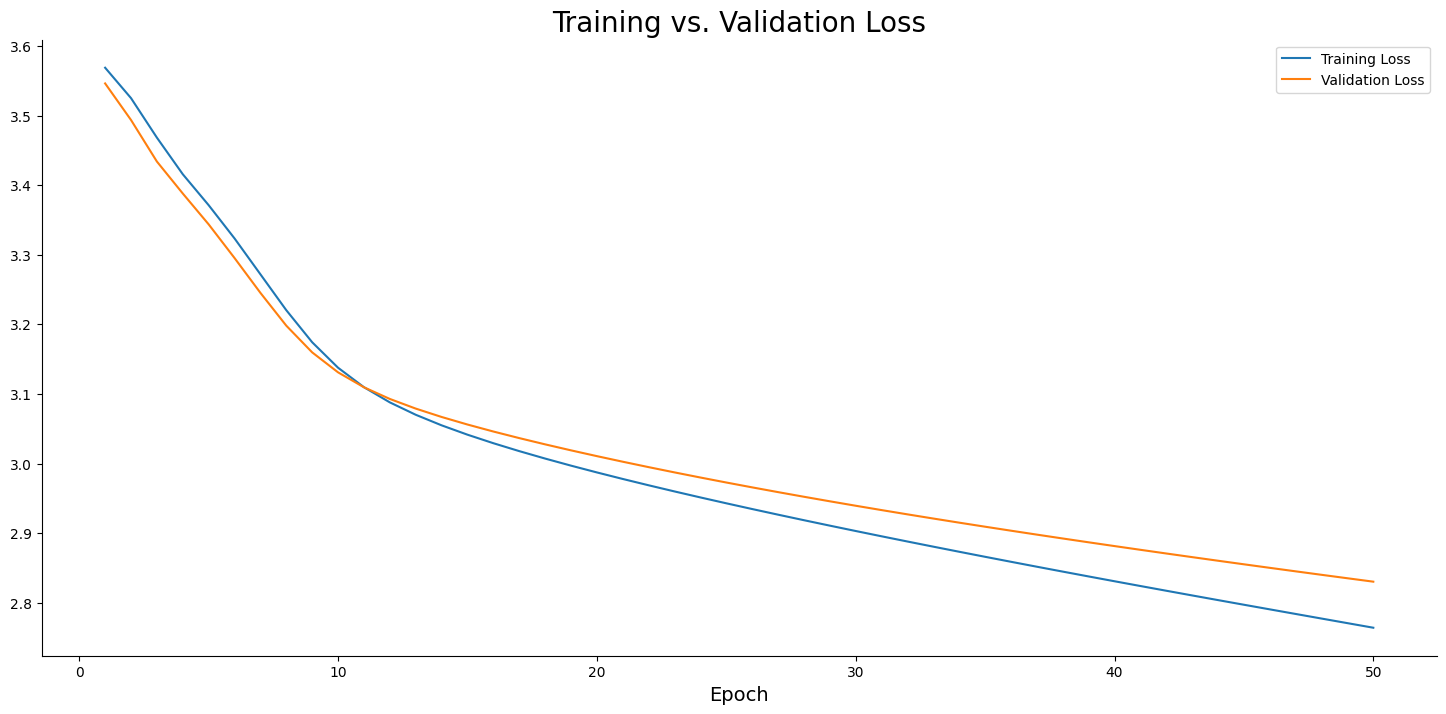

In [96]:
plt.plot(np.arange(1, 51), history_3.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 51), history_3.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [99]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),
                           input_shape=(98, 96, 3), activation='leaky_relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),
                           activation='leaky_relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),
                           input_shape=(98, 96, 3), activation='leaky_relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),
                           activation='leaky_relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),
                           activation='leaky_relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_4.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')]
)

history_4 = model_4.fit(
    train_images_02,
    train_labels_02,
    epochs=50,
    batch_size=128,
    validation_data=(test_images_02, test_labels_02)
)

Epoch 1/50


C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.4254 - loss: 1.0016 - val_accuracy: 0.8758 - val_loss: 0.9482
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7545 - loss: 0.7691 - val_accuracy: 0.8779 - val_loss: 0.8371
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7997 - loss: 0.6405 - val_accuracy: 0.8783 - val_loss: 0.6818
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7981 - loss: 0.5272 - val_accuracy: 0.8537 - val_loss: 0.5994
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8274 - loss: 0.4092 - val_accuracy: 0.8408 - val_loss: 0.5352
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8305 - loss: 0.3701 - val_accuracy: 0.8413 - val_loss: 0.4995
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8495 - loss: 0.3365 - val_accuracy: 0.8558 - val_loss: 0.4405
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8548 - loss: 0.3153 - val_accuracy: 0.8800 - val_loss: 0.

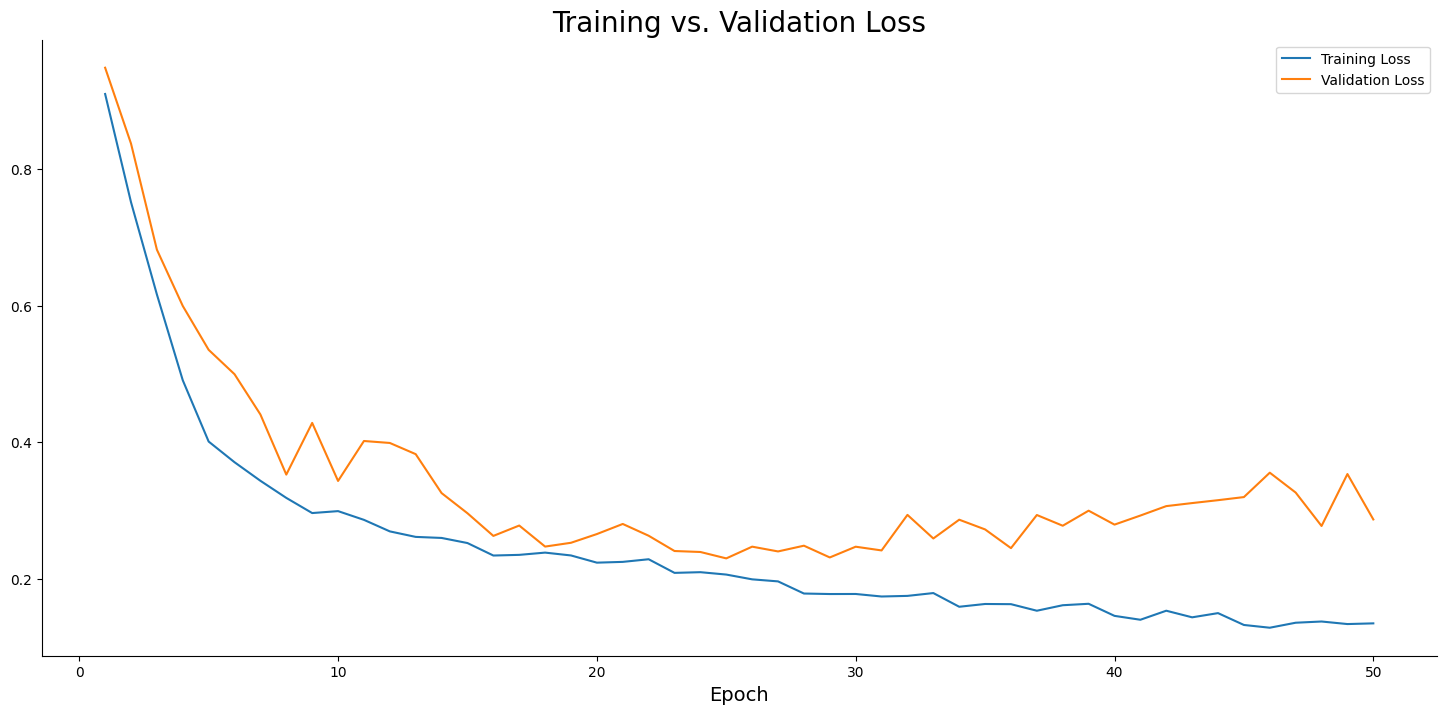

In [100]:
plt.plot(np.arange(1, 51), history_4.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 51), history_4.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [101]:
def Recall(y_true, y_predict):
    return TP(y_true, y_predict) / (TP(y_true, y_predict) + FN(y_true, y_predict))

Here is where I got the formula from 
https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=Recall%20is%20a%20metric%20that,the%20number%20of%20positive%20instances.

In [103]:
y_pred_model_03 = model_3.predict(test_images_02)
y_pred_model_03 = np.argmax(y_pred_model_03, axis=1)
y_true_model_03 = np.argmax(test_labels_02, axis=1)

y_pred_model_04 = model_4.predict(test_images_02)
y_pred_model_04 = np.argmax(y_pred_model_04, axis=1)
y_true_model_04 = np.argmax(test_labels_02, axis=1)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [106]:
print("Recal model 3:", Recall(y_true_model_03, y_pred_model_03))
print("Recal model 4:", Recall(y_true_model_04, y_pred_model_04))

Recal model 3: 0.8325
Recal model 4: 0.70375
